In [1]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving food_coded.csv to food_coded.csv


In [2]:
import io
df = pd.read_csv(io.BytesIO(uploaded['food_coded.csv']))
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [3]:
colm = ['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']
df = df[colm]
df.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


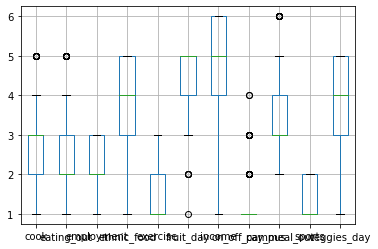

In [4]:
df.boxplot()

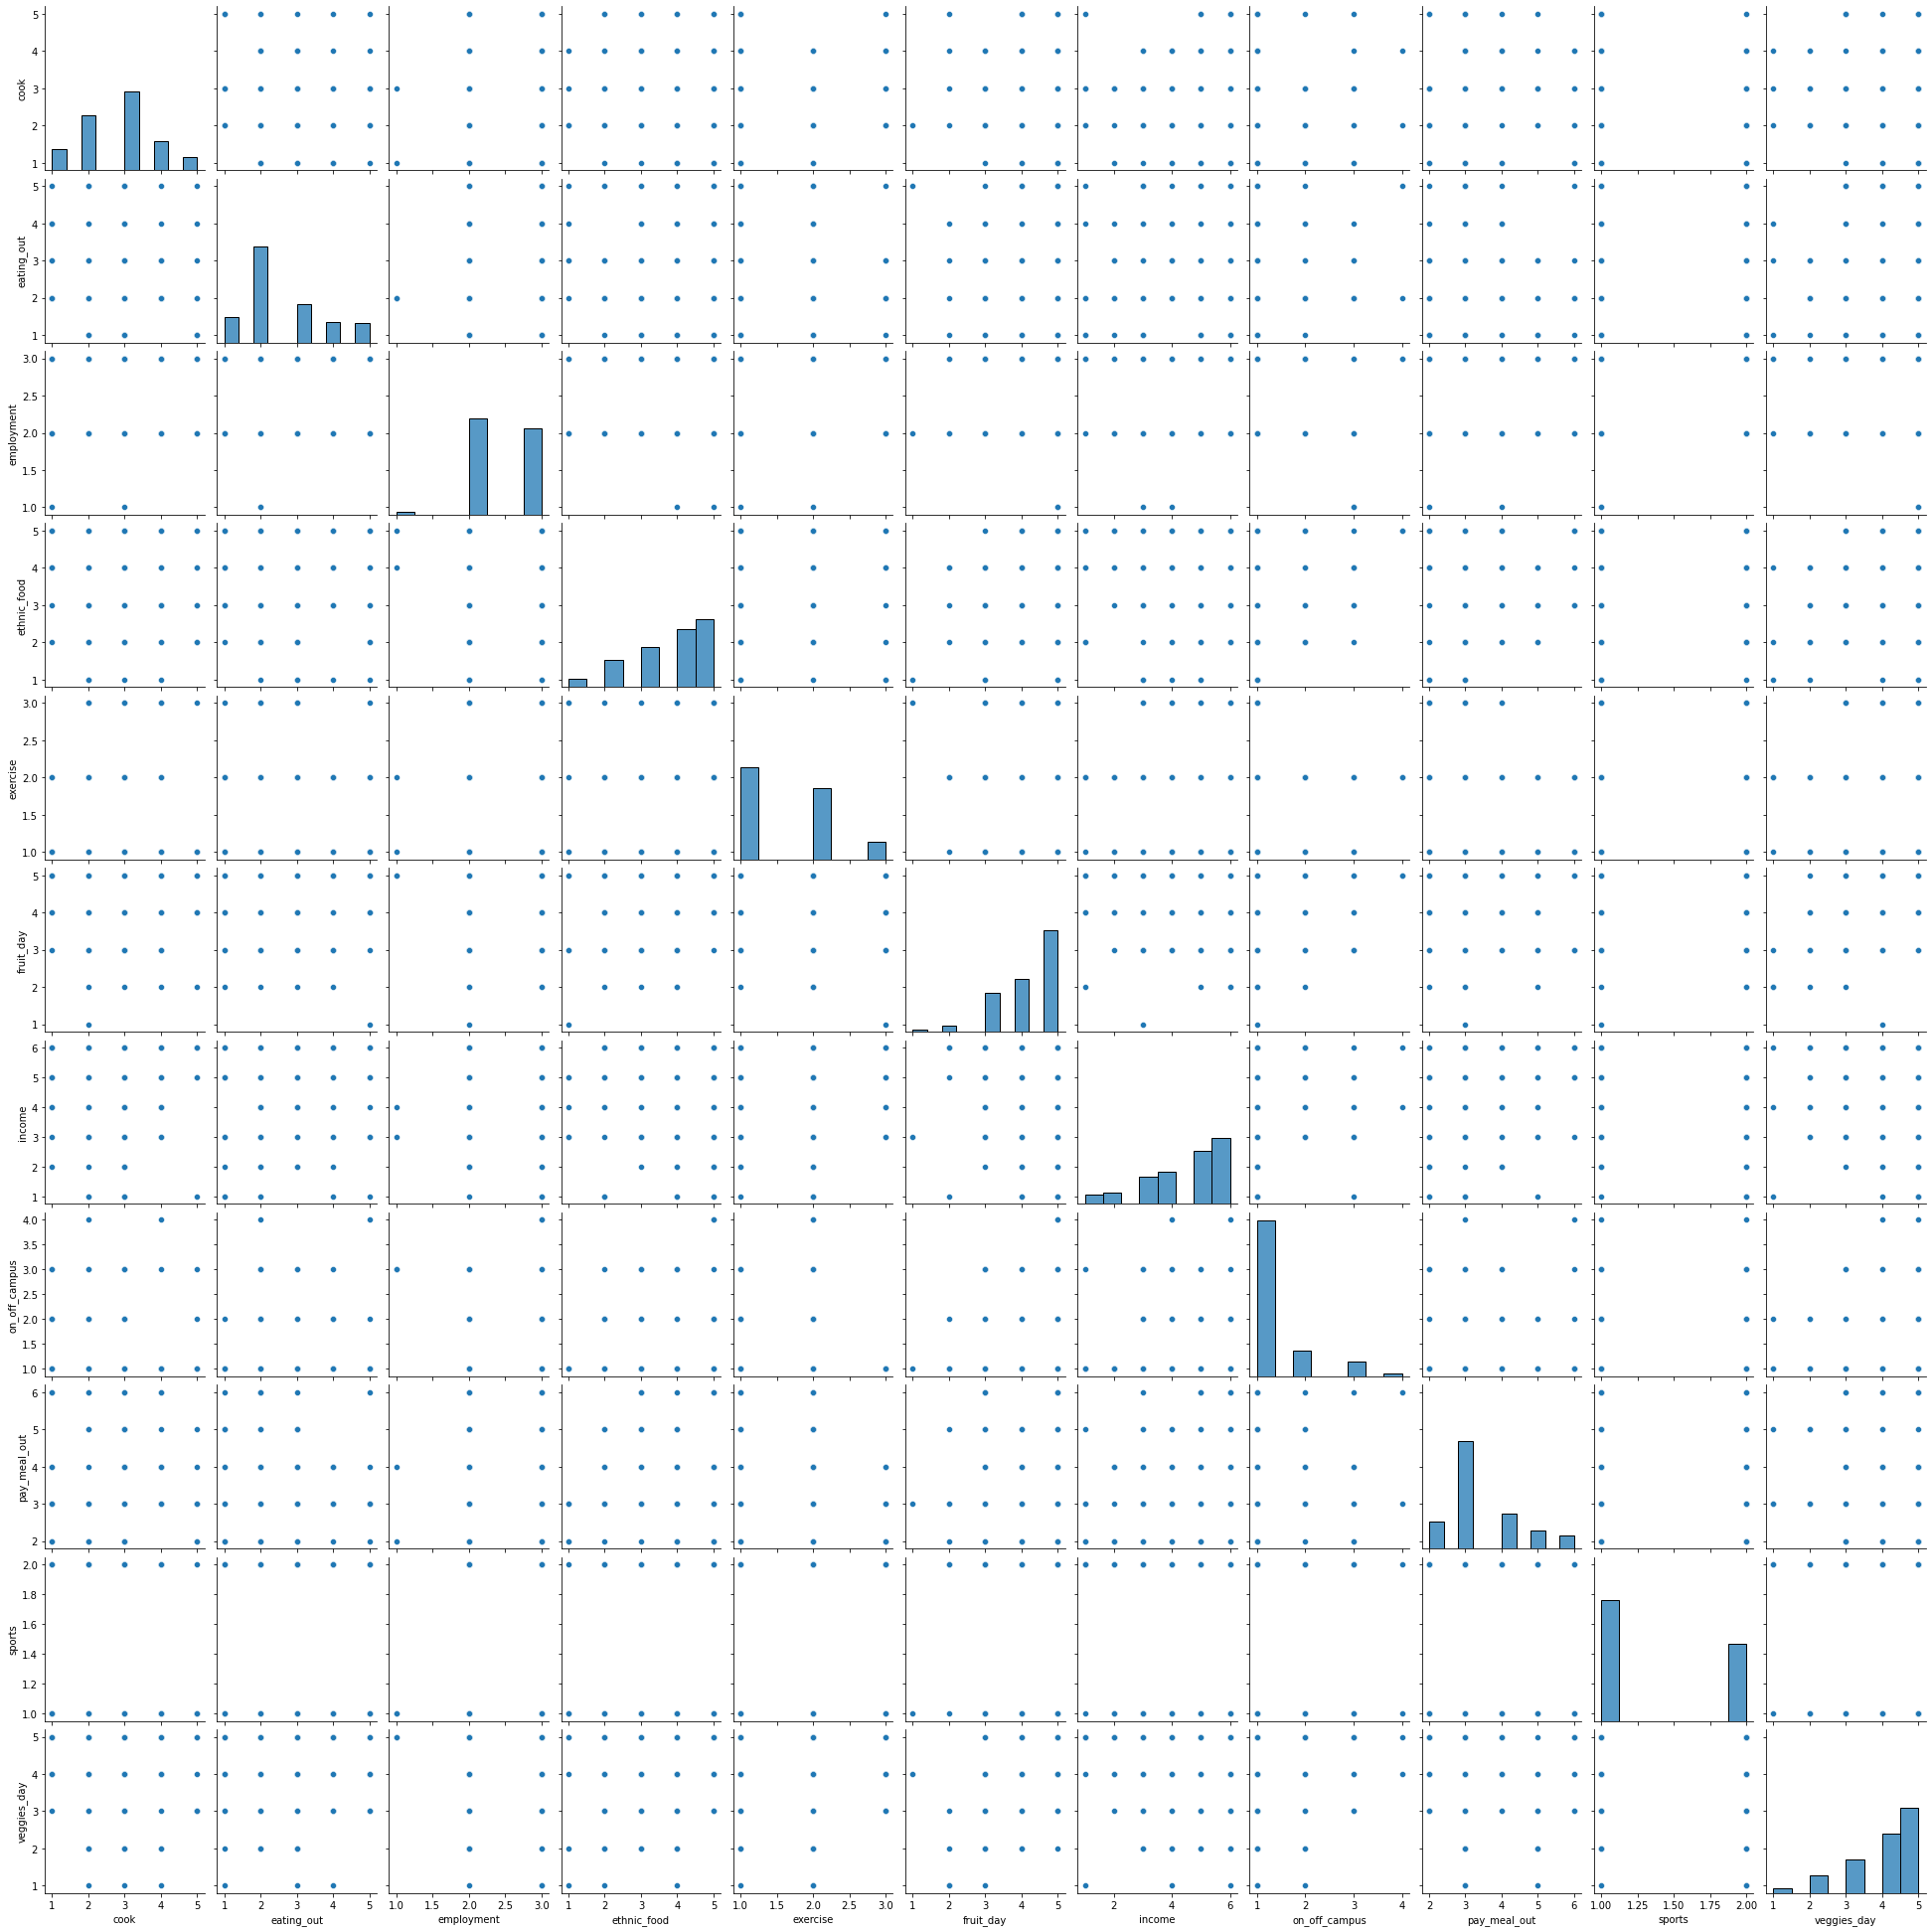

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [5]:
s=df.dropna()

In [6]:
import folium
import geopy
from sklearn import preprocessing, cluster
import scipy

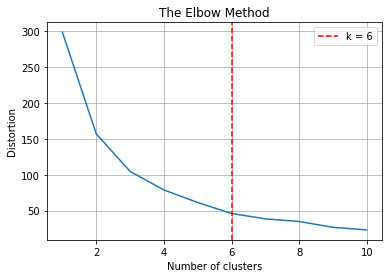

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
f=['cook','income']
X = s[f]
max_k = 10
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [8]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = "KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF" # your Foursquare ID
CLIENT_SECRET = "KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR" # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000

In [9]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    17.448372, 78.526957,
    30000, 
    LIMIT)

In [10]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '63b1c0e33cc30102486f4a73'},
 'response': {'queryRefinements': {'target': {'type': 'path',
    'url': '/venue/explore',
    'params': {'ll': '17.448372,78.526957', 'radius': '30000'}},
   'refinements': [{'query': 'Food'},
    {'query': 'Nightlife'},
    {'query': 'Coffee'},
    {'query': 'Shops'},
    {'query': 'Arts'},
    {'query': 'Outdoors'}]},
  'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hyderabad',
  'headerFullLocation': 'Hyderabad',
  'headerLocationGranularity': 'city',
  'totalResults': 129,
  'suggestedBounds': {'ne': {'lat': 17.71837227000027,
    'lng': 78.80945141641452},
   'sw': {'lat': 17.17837172999973, 'lng': 78.24446258358547}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInt

In [11]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues

<ipython-input-11-62056a142241>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.city,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood
0,e-0-4c1f7229b306c928046b68b7-0,0,"[{'summary': 'This spot is popular', 'type': '...",4c1f7229b306c928046b68b7,Fifth Avenue Bakers,Sainikpuri,17.487673,78.542793,"[{'label': 'display', 'lat': 17.48767334633119...",4687,...,India,"[Sainikpuri, Andhra Pradesh, India]","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN
1,e-0-4ce690beb9975481a0faf044-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ce690beb9975481a0faf044,Chutneys,Sardar Patel Road,17.443384,78.479939,"[{'label': 'display', 'lat': 17.44338406705275...",5024,...,India,"[Sardar Patel Road (Adjacent to FedEx Centre),...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Adjacent to FedEx Centre,Secunderabad,NaN,NaN,NaN
2,e-0-4df9c65c62e1e9a24367f9e5-2,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",6693,...,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],Narayanguda-himayat Nagar X Roads,Hyderabad,500029,NaN,NaN
3,e-0-4c08f54f6071a5934901dd32-3,0,"[{'summary': 'This spot is popular', 'type': '...",4c08f54f6071a5934901dd32,Nizam club,Saifabad,17.403221,78.468729,"[{'label': 'display', 'lat': 17.40322092112925...",7969,...,India,"[Saifabad (Opp public garden), Hyderabad 50000...","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],Opp public garden,Hyderabad,500004,NaN,NaN
4,e-0-4e089859a809495e619fa4d7-4,0,"[{'summary': 'This spot is popular', 'type': '...",4e089859a809495e619fa4d7,Necklace Road,Tank Bund,17.419384,78.465307,"[{'label': 'display', 'lat': 17.41938355146106...",7299,...,India,"[Tank Bund, Hyderabad, Telangana, India]","[{'id': '4bf58dd8d48988d165941735', 'name': 'S...",0,[],NaN,Hyderabad,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-5e6b9dfb248d4b00070439e0-95,0,"[{'summary': 'This spot is popular', 'type': '...",5e6b9dfb248d4b00070439e0,Starbucks,Arrivals Area c,17.236898,78.429424,"[{'label': 'display', 'lat': 17.236898, 'lng':...",25721,...,India,"[Arrivals Area c, Hyderabad 500108, TG, India]","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,Hyderabad,500108,NaN,NaN
96,e-0-551e9b2d498e9ac948c79377-96,0,"[{'summary': 'This spot is popular', 'type': '...",551e9b2d498e9ac948c79377,Idly Factory,Rajiv Gandhi International Airport,17.235055,78.430981,"[{'label': 'display', 'lat': 17.23505516849346...",25843,...,India,"[Rajiv Gandhi International Airport, Hyderabad...","[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",0,[],NaN,Hyderabad,NaN,NaN,NaN
97,e-0-4f48f142e4b01d17ba43f580-97,0,"[{'summary': 'This spot is popular', 'type': '...",4f48f142e4b01d17ba43f580,Celesté,Taj Falaknuma Palace Hotel,17.330125,78.467442,"[{'label': 'display', 'lat': 17.33012528251271...",14602,...,India,"[Taj Falaknuma Palace Hotel (Falaknuma), Hyder...","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],Falaknuma,Hyderabad,500053,NaN,NaN
98,e-0-4c14af55a1010f4762d24c18-98,0,"[{'summary': 'This spot is popular', 'type': '...",4c14af55a1010f4762d24c18,The Square,Novotel,17.242296,78.454518,"[{'label': 'display', 'lat': 17.24229626267616...",24196,...,India,"[Novotel, Hyderabad 500409, Telangana, India]","[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",0,[],NaN,Hyderabad,500409,NaN,NaN


In [12]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

<ipython-input-12-a50970c9ac62>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venue = json_normalize(venue)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.city,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-4c1f7229b306c928046b68b7-0,0,"[{'summary': 'This spot is popular', 'type': '...",4c1f7229b306c928046b68b7,Fifth Avenue Bakers,Sainikpuri,17.487673,78.542793,"[{'label': 'display', 'lat': 17.48767334633119...",4687,...,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN,6,1
1,e-0-4ce690beb9975481a0faf044-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ce690beb9975481a0faf044,Chutneys,Sardar Patel Road,17.443384,78.479939,"[{'label': 'display', 'lat': 17.44338406705275...",5024,...,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Adjacent to FedEx Centre,Secunderabad,NaN,NaN,NaN,19,3
2,e-0-4df9c65c62e1e9a24367f9e5-2,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",6693,...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],Narayanguda-himayat Nagar X Roads,Hyderabad,500029,NaN,NaN,24,8
3,e-0-4c08f54f6071a5934901dd32-3,0,"[{'summary': 'This spot is popular', 'type': '...",4c08f54f6071a5934901dd32,Nizam club,Saifabad,17.403221,78.468729,"[{'label': 'display', 'lat': 17.40322092112925...",7969,...,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],Opp public garden,Hyderabad,500004,NaN,NaN,18,16
4,e-0-4e089859a809495e619fa4d7-4,0,"[{'summary': 'This spot is popular', 'type': '...",4e089859a809495e619fa4d7,Necklace Road,Tank Bund,17.419384,78.465307,"[{'label': 'display', 'lat': 17.41938355146106...",7299,...,"[{'id': '4bf58dd8d48988d165941735', 'name': 'S...",0,[],NaN,Hyderabad,NaN,NaN,NaN,15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-5e6b9dfb248d4b00070439e0-95,0,"[{'summary': 'This spot is popular', 'type': '...",5e6b9dfb248d4b00070439e0,Starbucks,Arrivals Area c,17.236898,78.429424,"[{'label': 'display', 'lat': 17.236898, 'lng':...",25721,...,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,Hyderabad,500108,NaN,NaN,18,13
96,e-0-551e9b2d498e9ac948c79377-96,0,"[{'summary': 'This spot is popular', 'type': '...",551e9b2d498e9ac948c79377,Idly Factory,Rajiv Gandhi International Airport,17.235055,78.430981,"[{'label': 'display', 'lat': 17.23505516849346...",25843,...,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",0,[],NaN,Hyderabad,NaN,NaN,NaN,18,13
97,e-0-4f48f142e4b01d17ba43f580-97,0,"[{'summary': 'This spot is popular', 'type': '...",4f48f142e4b01d17ba43f580,Celesté,Taj Falaknuma Palace Hotel,17.330125,78.467442,"[{'label': 'display', 'lat': 17.33012528251271...",14602,...,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],Falaknuma,Hyderabad,500053,NaN,NaN,3,2
98,e-0-4c14af55a1010f4762d24c18-98,0,"[{'summary': 'This spot is popular', 'type': '...",4c14af55a1010f4762d24c18,The Square,Novotel,17.242296,78.454518,"[{'label': 'display', 'lat': 17.24229626267616...",24196,...,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",0,[],NaN,Hyderabad,500409,NaN,NaN,2,3


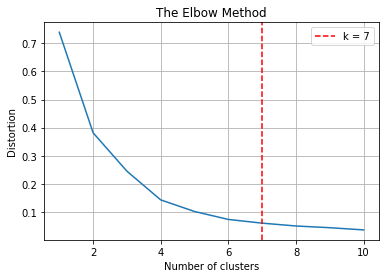

In [14]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']
f=['venue.location.lat','venue.location.lng']
X = nearby_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [15]:
city = "Hyderabad"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Hyderabad, Bahadurpura mandal, Hyderabad, Telangana, India
[lat, long]: [17.360589, 78.4740613]


In [16]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.neighborhood',	'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [17]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

In [18]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,17.487673,78.542793,"[Sainikpuri, Andhra Pradesh, India]",6,1
1,17.443384,78.479939,"[Sardar Patel Road (Adjacent to FedEx Centre),...",19,3
2,17.400678,78.488575,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,24,8
3,17.403221,78.468729,"[Saifabad (Opp public garden), Hyderabad 50000...",18,16
4,17.419384,78.465307,"[Tank Bund, Hyderabad, Telangana, India]",15,17
...,...,...,...,...,...
95,17.236898,78.429424,"[Arrivals Area c, Hyderabad 500108, TG, India]",18,13
96,17.235055,78.430981,"[Rajiv Gandhi International Airport, Hyderabad...",18,13
97,17.330125,78.467442,"[Taj Falaknuma Palace Hotel (Falaknuma), Hyder...",3,2
98,17.242296,78.454518,"[Novotel, Hyderabad 500409, Telangana, India]",2,3


In [19]:
n['venue.location.formattedAddress']
spec_chars = ["[","]"]
for char in spec_chars:
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')

<ipython-input-19-339fb52ab903>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')


In [20]:
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = n.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_